In [ ]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop

In [ ]:
''' train and test path '''
train_path = pathlib.Path("/content/drive/MyDrive/Deep Learning Projects 43 - Skin Cancer Recognizer using DL/Data/Train")
test_path = pathlib.Path('/content/drive/MyDrive/Deep Learning Projects 43 - Skin Cancer Recognizer using DL/Data/Test')

In [ ]:
''' length of train data '''
train_image_len = len(list(train_path.glob('*/*.jpg')))
print(train_image_len)

''' length of test data '''
test_image_len = len(list(test_path.glob('*/*.jpg')))
print(test_image_len)

1841
106


In [ ]:
batch_size = 32
image_w = 100
image_h = 100

In [ ]:
''' data augmentation '''
''' using 80-20 split of data, 80% for training and 20% for validation '''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(image_h, image_w),
    batch_size = batch_size)

Found 1841 files belonging to 9 classes.
Using 1473 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(image_h, image_w),
    batch_size = batch_size)

Found 1841 files belonging to 9 classes.
Using 368 files for validation.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=123,
    image_size=(image_h, image_w),
    batch_size = batch_size)

Found 106 files belonging to 10 classes.


In [ ]:
image_path = "/content/drive/MyDrive/Deep Learning Projects 43 - Skin Cancer Recognizer using DL/Data/Test/actinic keratosis/ISIC_0010512.jpg"
image = PIL.Image.open(image_path)
image.size

(1024, 768)

In [ ]:
c_names = train_ds.class_names
print(c_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
''' plotting some images '''
# for i in range(9): 
#     plt.figure(figsize=(10,10))
#     plt.subplot(3, 3, i + 1)
#     img = mpimg.imread(str(list(train_ds.glob(c_names[i]+'/*.jpg'))[1]))
#     plt.title(c_names[i])
#     plt.imshow(image)

' plotting some images '

In [ ]:
''' AUTOTUNE '''
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
''' preprocessing layer '''
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_h, image_w, 3))])

''' Convolutional Layers '''
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu', input_shape = (100, 100, 32)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

''' adding dropout '''
model.add(Dropout(0.75))
model.add(Flatten())

# model.add(Dense(556, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))

''' Classification Layer'''
model.add(Dense(9, activation = "softmax"))

In [ ]:
''' Compile the model '''
model.compile(optimizer='adam', loss="SparseCategoricalCrossentropy",
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=50)

Epoch 1/50
47/47 [==============================] - 15s 83ms/step - loss: 2.0845 - accuracy: 0.1840 - val_loss: 1.9855 - val_accuracy: 0.2120
Epoch 2/50
47/47 [==============================] - 1s 22ms/step - loss: 2.0493 - accuracy: 0.2030 - val_loss: 1.9904 - val_accuracy: 0.2283
Epoch 3/50
47/47 [==============================] - 1s 22ms/step - loss: 2.0283 - accuracy: 0.2335 - val_loss: 1.9295 - val_accuracy: 0.3179
Epoch 4/50
47/47 [==============================] - 1s 22ms/step - loss: 1.9611 - accuracy: 0.2960 - val_loss: 2.0246 - val_accuracy: 0.2228
Epoch 5/50
47/47 [==============================] - 1s 22ms/step - loss: 1.9432 - accuracy: 0.2845 - val_loss: 1.7173 - val_accuracy: 0.4130
Epoch 6/50
47/47 [==============================] - 1s 22ms/step - loss: 1.9692 - accuracy: 0.2831 - val_loss: 1.8535 - val_accuracy: 0.3261
Epoch 7/50
47/47 [==============================] - 1s 22ms/step - loss: 1.9309 - accuracy: 0.3198 - val_loss: 2.0507 - val_accuracy: 0.2065
Epoch 8/50
4

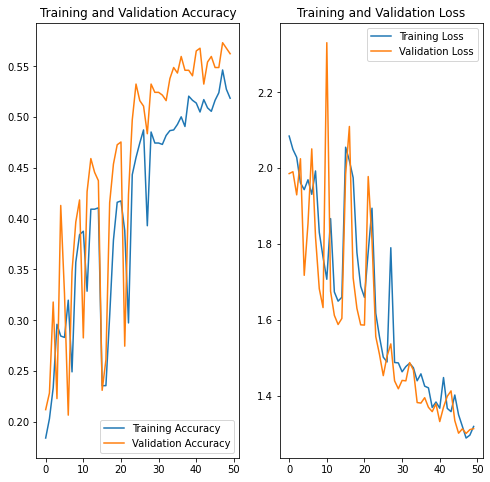

In [ ]:
''' plotting training accuracy and validation accuracy graph '''
epochs_range = range(50)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

''' plotting training loss and validation loss graph '''
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_label = test_ds.class_names
test_label

['.ipynb_checkpoints',
 'actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

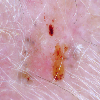

In [ ]:
# from tensorflow.keras.preprocessing.image import load_img
image_path = "/content/drive/MyDrive/Deep Learning Projects 43 - Skin Cancer Recognizer using DL/Data/Train/basal cell carcinoma/ISIC_0024504.jpg"
image = preprocessing.image.load_img(image_path, target_size=(100, 100))
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [ ]:
prediction = model.predict(scaled_img)
pred_label = c_names[np.argmax(prediction)]
pred_label

'basal cell carcinoma'

In [ ]:
model.evaluate(test_ds)

4/4 [==============================] - 2s 11ms/step - loss: nan - accuracy: 0.1981


[nan, 0.19811320304870605]